In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 23 16:07:54 2021

@author: qyk
"""

"""select the images with least variance of likelity and familiarity 
   between subjects and images"""
   

import os
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

filePath = r'/content/2021_08_23_09_06_37.xlsx'
rating_data = pd.read_excel(filePath)
rating_data = rating_data.iloc[:,19:-8]

score = rating_data.iloc[1:,0::2].astype(float)
familiar_score = score.iloc[:,:89]
familiar_score.columns= ['Image' + str(i) for i in range(1,90)]
like_score = score.iloc[:,90:]


like_score.columns= ['Image'+str(i) for i in range(1,90)]

rt = rating_data.iloc[1:,1::2].astype(float)
familiar_rt = rt.iloc[:,:89]
like_rt = rt.iloc[:,89:]

# 剔除不认真的被试
familiar_rt  = familiar_rt.astype(float)
familiar_rt_count = familiar_rt[familiar_rt<500].count(axis=1)
familiar_bad_subject = familiar_rt_count[familiar_rt_count>3].index
familiar_score = familiar_score.drop(familiar_bad_subject)

like_rt  = like_rt.astype(float)
like_rt_count= like_rt[like_rt<500].count(axis=1)
like_bad_subject = like_rt_count[like_rt_count>3].index
like_score = like_score.drop(like_bad_subject)

# 计算图片的被试间评分方差
pic_familiar_mean = familiar_score.mean()
pic_familiar_std = familiar_score.std()

pic_like_mean = like_score.mean()
pic_like_std = like_score.std()

# 挑出低被试间方差的图片
pic_sub_std = pic_like_std**2 + pic_familiar_std**2
low_std_pic = pic_sub_std.sort_values()[:35].index.to_list() 
print(len(low_std_pic))

35


In [14]:
# 从低被试间方差的图片的组合，计算图片间方差,算出图片间方差最小的图片组合
low_std_pic_groups = list(itertools.combinations(low_std_pic,30))
least_std = 2
max_std = 0
least_std_group = 0
std_curve = []
for i, pic_group in enumerate(low_std_pic_groups):
    image_group_failiar_std = pic_familiar_mean[list(pic_group)].std() # 计算图片组合内的方差
    image_group_like_std = pic_like_mean[list(pic_group)].std()
    image_group_std = image_group_failiar_std**2 + image_group_like_std**2
    print(image_group_std)
    if image_group_std < least_std:
        least_std = image_group_std
        least_std_group = i
    std_curve.append(least_std)
least_std_pic_group = low_std_pic_groups[least_std_group]
print(least_std_group)


data_plot = pd.concat([pic_familiar_mean,pic_familiar_std,pic_like_mean,pic_like_std],
                          axis=1,sort=False,keys=['familiar_mean', 'familiar_std', 
                                      'like_mean','like_std'])
data_plot['selected'] = 0
data_plot.loc[least_std_pic_group ,'selected'] = 1

流式输出内容被截断，只能显示最后 5000 行内容。
0.47538490313662585
0.45950991053216184
0.46372080545914857
0.48263003953985983
0.43334127946338163
0.4402892302430623
0.45717884606255227
0.44834881105797864
0.4622781077423439
0.4678722860791825
0.4862163643795525
0.4757594196323807
0.450329818743362
0.4704930533352888
0.4758022902939154
0.4938209149034454
0.4833694695442994
0.4584473109252927
0.48701671779784483
0.46915555961547195
0.47448466241313336
0.492629871618634
0.48212080936489077
0.4571776512137383
0.48572406713945415
0.4935577557475922
0.433740263122411
0.4405996635280041
0.45788927618692643
0.4487848828241961
0.4207561532626149
0.45079843356605254
0.4589889626161997
0.4576954619449324
0.42859764538981376
0.43568523262582226
0.4520620810039402
0.4435996853050875
0.41500218920713616
0.44550936282888287
0.4535432217607921
0.4523025118227398
0.41575083856224204
0.4495114125727516
0.45601889634127657
0.4723809748463126
0.4635729075868595
0.436098154132028
0.46614272443388083
0.4739506690607324
0.4727

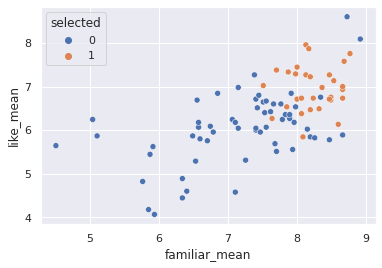

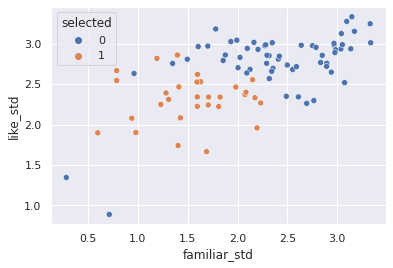

In [15]:
sns.scatterplot(data=data_plot,x='familiar_mean',y='like_mean',hue='selected')
plt.show()

sns.scatterplot(data=data_plot,x='familiar_std',y='like_std',hue='selected')
plt.show()

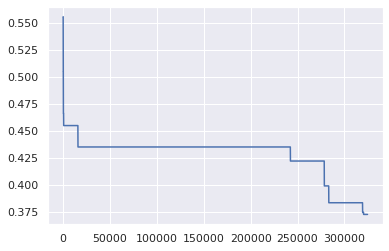

In [16]:
sns.lineplot(x=range(1,len(std_curve)+1),y=std_curve)
plt.show()

In [17]:
print(len(low_std_pic))
print('least_std',least_std)
print('max_std',max_std)

35
least_std 0.3723220271727891
max_std 0


In [20]:
least_std_pic_group

('Image71',
 'Image58',
 'Image29',
 'Image67',
 'Image25',
 'Image23',
 'Image74',
 'Image34',
 'Image21',
 'Image63',
 'Image83',
 'Image76',
 'Image45',
 'Image44',
 'Image88',
 'Image20',
 'Image66',
 'Image59',
 'Image57',
 'Image72',
 'Image56',
 'Image5',
 'Image47',
 'Image12',
 'Image80',
 'Image55',
 'Image35',
 'Image4',
 'Image14',
 'Image85')

In [10]:
a = ['Image67', 'Image23', 'Image74', 'Image34', 'Image21', 'Image63',
       'Image83', 'Image76', 'Image64', 'Image45', 'Image44', 'Image88',
       'Image20', 'Image66', 'Image59', 'Image57', 'Image72', 'Image56',
       'Image5', 'Image19', 'Image47', 'Image12', 'Image80', 'Image55',
       'Image43', 'Image35', 'Image4', 'Image14', 'Image85']

In [23]:
trial_index = [int(pic.split('e')[-1]) for pic in least_std_pic_group]
trial_index.sort()
trial_index

[4,
 5,
 12,
 14,
 20,
 21,
 23,
 25,
 29,
 34,
 35,
 44,
 45,
 47,
 55,
 56,
 57,
 58,
 59,
 63,
 66,
 67,
 71,
 72,
 74,
 76,
 80,
 83,
 85,
 88]

In [19]:
for pic in least_std_pic_group:
  if pic not in a:
    print(pic)

Image71
Image58
Image29
Image25


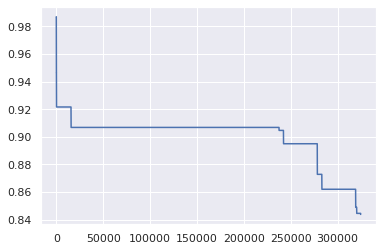

In [13]:
sns.lineplot(x=range(1,len(std_curve)+1),y=std_curve)
plt.show()